# Import required packages

In [1]:
# Linear Algebra packages
using LinearAlgebra
using SparseArrays

In [2]:
#=
We can install packages on the go as shown below. Uncomment following lines 
if you dont have the ploting package or leave it as it is. 
=#
# using Pkg
# Pkg.add("PyPlot") # Download the PyPlot package
# Pkg.add("Gadfly") # Download the Gadfly package
# Pkg.add("Plots") # Download the Plots package

In [3]:
# Plotting Packages
using PyPlot 
using Gadfly 
using Plots

# Part 1
Quick tutorial for the Julia language and giving taste of it. 

## Part 1.1 Testing
Following information has been pulled from the following [link](http://www.math.wayne.edu/~sheng/teaching/julia.pdf) and [link](https://people.smp.uq.edu.au/YoniNazarathy/julia-stats/StatisticsWithJulia.pdf).
- Variables
- Print
- Matrices

In [4]:
# Testing out how to print
a = 2 # assigning variables
print(2)
print("wow") # Strings must be passed in the form of double quotations

2wow

In [5]:
# Testing out how to print
a = 2
println(2) # println prints and goes to next line
print("wow")

2
wow

In [6]:
A = rand(3, 3) # Creating a random 3x3 matrix 
B = I(3) # Identity matrix

3×3 Diagonal{Bool,Array{Bool,1}}:
 1  ⋅  ⋅
 ⋅  1  ⋅
 ⋅  ⋅  1

In [7]:
ones(8) # creating array filled with value 1 and size 8x1

8-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [8]:
# Accessing a particular element from a matrix
println(A, "\n") # Here we can see how to print different things in a single print

println("Notice how Julia starts the array element from 1 similar Matlab")
println(A[1, 1]) 

[0.9041878549239395 0.7906748472769733 0.2778747978488292; 0.7930550510987251 0.5380410983648489 0.8105755797368097; 0.5791608958408065 0.25426112663994815 0.979134770669742]

Notice how Julia starts the array element from 1 similar Matlab
0.9041878549239395


In [9]:
inv(A) # Calculating the inverse of a matrix

3×3 Array{Float64,2}:
  19.2615  -42.252    29.5119 
 -18.4409   43.505   -30.7821 
  -6.6045   13.6948   -8.44161

In [10]:
# Gil Strang’s favorite matrix
# Notice how Julia only stores the diagonal and off-diagonal if the other elements are zero
# This shows how we can create single line functions
strang(n) = SymTridiagonal(2*ones(n),-ones(n-1)) 

strang(7)

7×7 SymTridiagonal{Float64,Array{Float64,1}}:
  2.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅ 
 -1.0   2.0  -1.0    ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0   2.0  -1.0    ⋅     ⋅     ⋅ 
   ⋅     ⋅   -1.0   2.0  -1.0    ⋅     ⋅ 
   ⋅     ⋅     ⋅   -1.0   2.0  -1.0    ⋅ 
   ⋅     ⋅     ⋅     ⋅   -1.0   2.0  -1.0
   ⋅     ⋅     ⋅     ⋅     ⋅   -1.0   2.0

In [11]:
#= 
This shows how to do multi-line comment (these are nestable)...
A commonly used notation to express the solution x to the equation Ax = b is
A\b. If Julia knows that A is a tridiagonal matrix, it uses an efficient O(n) algorithm:
=#
strang(8)\ones(8)

8-element Array{Float64,1}:
  4.0              
  7.0              
  9.0              
 10.000000000000002
 10.000000000000002
  9.0              
  7.0              
  4.0              

## Part 1.2
Plotting using `PyPlot`

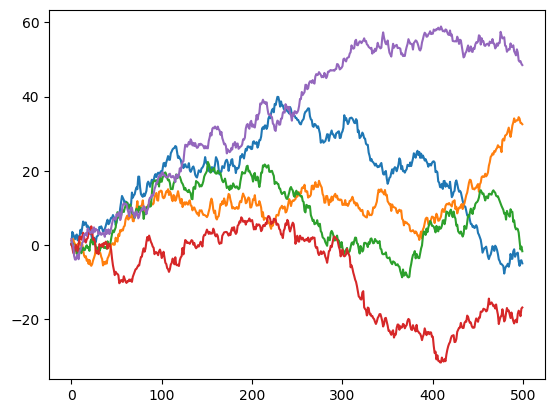

In [16]:
# Note indentations doesn't matter to julia but it is good for readability
# It needs end after for similar to Matlab
for i=1:5
    y=cumsum(randn(500))
    PyPlot.plot(y)
end

## Part 1.3 
Plotting using `Plots`

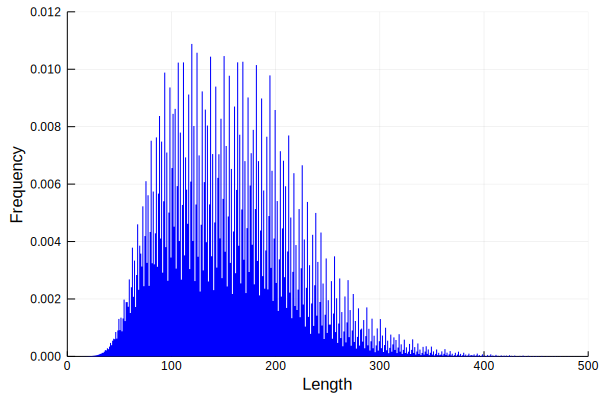

In [17]:
# Nice histogram related to Collatz Conjecture
function hailLength(x::Int)
    n = 0
    while x != 1
        if x % 2 == 0
            x = Int(x/2)
        else
            x = 3x +1
        end
        n += 1
    end
    return n
end

lengths = [hailLength(i) for i in 2:10^7]

Plots.histogram(lengths, bins=1000, normed=:true, fill=(:blue, true), la=0, 
    legend=:none, xlims=(0, 500), ylims=(0, 0.012), xlabel="Length", ylabel="Frequency")

## Part 1.4
One can find detailed description for `Gadfly` libray [here](http://gadflyjl.org/stable/).

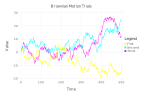

In [14]:
# Many Julia users find Gadfly more flexible and prefer its aesthetics
n = 500
l = ["First", "Second", "Third"]
c = [colorant"yellow",colorant"cyan",colorant"magenta"]
p = [layer(x=1:n, y=cumsum(randn(n)), Geom.line, Theme(default_color=i)) for i in c ]

labels=(Guide.xlabel("Time"),Guide.ylabel("Value"), Guide.title("Brownian Motion Trials"), 
    Guide.manual_color_key("Legend", l, c))

Gadfly.plot(p...,labels...)

## Part 1.5 
Invoking help

In [15]:
# Using the syntax below we can find the definition of that function
? print

LoadError: syntax: invalid identifier name "?"